In [2]:
import pandas as pd
import numpy as np
from get_trajectories import compute_mvt_metric

In [3]:
def get_frame_position_df(position_df: pd.DataFrame,
                            frame: int, 
                            stride: int = 2) -> pd.DataFrame:
    """
    Get the position of droplets in a specific frame as a DataFrame.

    Parameters
    ----------
    frame : int
        Frame number.
    real_data_frame : int
        Real data frame number.
    stride : int, optional
        Stride value for subsampling the position data. Defaults to 2.

    Returns
    -------
    df : pandas.DataFrame
        DataFrame containing the positions of droplets in the frame.
    """
    x = np.array(position_df.iloc[::stride, frame])
    y = np.array(position_df.iloc[1::stride, frame])
    pos = np.array([x, y]).T
    index = position_df.index[::stride]
    index = [i[1:-2] for i in index]
    df = pd.DataFrame(pos, index=index, columns=[f"x{frame}", f"y{frame}"])

    return df

def get_position_df(position_df: pd.DataFrame, 
                    start_frame: int,
                    end_frame: int,
                    stride: int = 2) -> pd.DataFrame:
    """
    Get the position of droplets in a range of frames as a DataFrame.

    Parameters
    ----------
    start_frame : int
        First frame number.
    end_frame : int
        Last frame number.
    stride : int, optional
        Stride value for subsampling the position data. Defaults to 2.

    Returns
    -------
    df : pandas.DataFrame
        DataFrame containing the positions of droplets in the range of frames.
    """
    df = pd.DataFrame()
    for frame in range(start_frame, end_frame+1):
        df = pd.concat([df, get_frame_position_df(position_df, frame, stride)], axis=1)
    return df

In [4]:
import numpy as np

def bhattacharyya(hist1, hist2):
    """Compute the Bhattacharyya coefficient between two histograms."""
    # Normalize histograms
    hist1 = hist1 / np.sum(hist1)
    hist2 = hist2 / np.sum(hist2)
    
    hist1 = np.array(hist1)
    hist2 = np.array(hist2)
    bc = np.sum(np.sqrt(hist1 * hist2))
    return bc

In [5]:
# Read a results file and print the results in a table
results_medium = pd.read_csv('../../evaluation/01_simulated/medium_mvt_6000_droplets.csv', index_col=0)
results_small = pd.read_csv('../../evaluation/01_simulated/small_mvt_6000_droplets.csv', index_col=0)
results_large = pd.read_csv('../../evaluation/01_simulated/large_mvt_6000_droplets.csv', index_col=0)

num_frames = len(results_medium.columns)

results_medium = get_position_df(results_medium, 6, 9, 2)
results_small = get_position_df(results_small, 6, 9, 2)
results_large = get_position_df(results_large, 6, 9, 2)

In [6]:
compute_mvt_metric(None, results_medium, normalize="droplet_radius", droplet_radius=2)

,all_mean,all_std,6_7,7_8,8_9
mean,3.425,0.013,3.410,3.425,3.442
std,3.879,0.145,4.037,3.686,3.914
median,2.385,0.063,2.300,2.452,2.401
mad,1.939,0.174,1.699,2.011,2.107
min,0.000,0.000,0.000,0.000,0.000
max,34.749,2.463,38.211,32.686,33.351
q20,0.370,0.150,0.556,0.366,0.189
q80,5.521,0.191,5.252,5.635,5.676
p_moved_1r,0.691,0.008,0.693,0.700,0.680
p_moved_5r,0.236,0.015,0.214,0.242,0.250


In [7]:
compute_mvt_metric(None, results_small, normalize="droplet_radius", droplet_radius=2)

,all_mean,all_std,6_7,7_8,8_9
mean,0.041,0.002,0.040,0.044,0.040
std,0.113,0.019,0.101,0.140,0.098
median,0.000,0.000,0.000,0.000,0.000
mad,0.000,0.000,0.000,0.000,0.000
min,0.000,0.000,0.000,0.000,0.000
max,1.851,0.882,1.151,3.095,1.307
q20,0.000,0.000,0.000,0.000,0.000
q80,0.054,0.006,0.045,0.060,0.057
p_moved_1r,0.001,0.001,0.000,0.002,0.000
p_moved_5r,0.000,0.000,0.000,0.000,0.000


In [8]:
compute_mvt_metric(None, results_small, normalize="max_distance", droplet_radius=2)

,all_mean,all_std,6_7,7_8,8_9
mean,0.000,0.000,0.000,0.000,0.000
std,0.000,0.000,0.000,0.001,0.000
median,0.000,0.000,0.000,0.000,0.000
mad,0.000,0.000,0.000,0.000,0.000
min,0.000,0.000,0.000,0.000,0.000
max,0.008,0.004,0.005,0.013,0.005
q20,0.000,0.000,0.000,0.000,0.000
q80,0.000,0.000,0.000,0.000,0.000


In [9]:
df = compute_mvt_metric(None, results_large, normalize="droplet_radius", droplet_radius=2)
df

,all_mean,all_std,6_7,7_8,8_9
mean,16.087,0.445,15.497,16.573,16.191
std,10.021,0.217,10.301,9.773,9.988
median,14.077,0.856,12.986,15.077,14.167
mad,6.314,0.180,6.060,6.450,6.433
min,0.133,0.102,0.031,0.272,0.096
max,63.794,0.735,64.335,64.292,62.755
q20,7.431,0.414,6.915,7.929,7.449
q80,23.868,0.504,23.200,24.419,23.985
p_moved_1r,0.995,0.001,0.994,0.997,0.994
p_moved_5r,0.898,0.012,0.882,0.912,0.899


In [10]:
mvt, dist = compute_mvt_metric(None, results_medium, normalize="droplet_radius", droplet_radius=2, return_dist=True)
hist_sim = np.histogram(dist, bins=100)

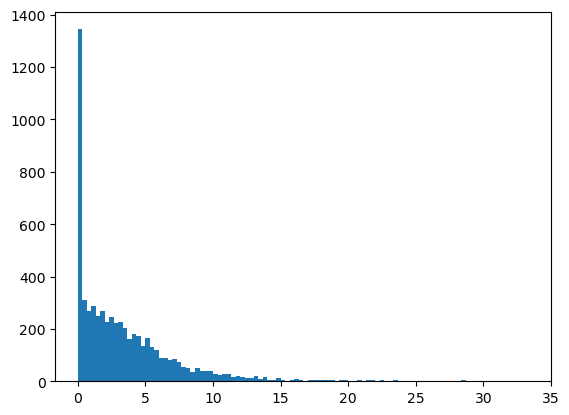

In [11]:
import matplotlib.pyplot as plt
# hist of dist
plt.hist(dist, bins=100)
plt.show()

In [16]:
results_pred = pd.read_csv('../../evaluation/05_results/medium_mvt_6000/filtered_trajectories__basic.csv', index_col=0)

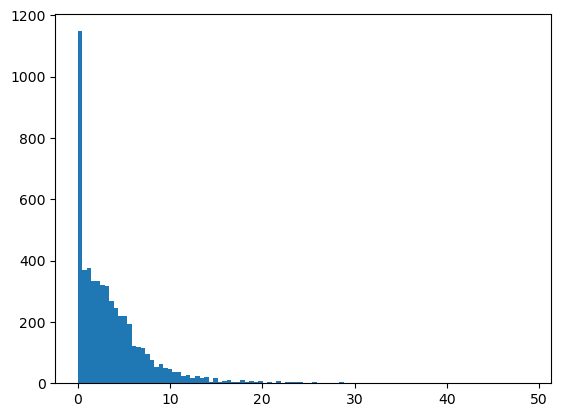

In [17]:
import matplotlib.pyplot as plt
mvt, dist = compute_mvt_metric(None, results_pred, normalize="droplet_radius", droplet_radius=2, return_dist=True)
hist_pred = np.histogram(dist, bins=100)
plt.hist(dist, bins=100)
plt.show()

In [20]:
# Compute the Bhattacharyya coefficient between the two histograms
bhattacharyya(hist_sim[0], hist_pred[0])

0.9787138509389585

In [21]:
compute_mvt_metric(None, results_pred, normalize="droplet_radius", droplet_radius=2)

,all_mean,all_std,0_1,1_2,2_3
mean,3.662,0.025,3.626,3.683,3.677
std,4.071,0.158,4.272,3.886,4.056
median,2.600,0.096,2.465,2.680,2.654
mad,1.958,0.175,1.718,2.027,2.128
min,0.000,0.000,0.000,0.000,0.000
max,59.969,8.963,70.829,60.202,48.877
q20,0.565,0.125,0.713,0.576,0.407
q80,5.753,0.200,5.474,5.933,5.853
p_moved_1r,0.726,0.007,0.723,0.735,0.718
p_moved_5r,0.253,0.018,0.228,0.263,0.267


In [22]:
# Small mvt real data
results = pd.read_csv('../../data/05_results/small_mvt_1_4cuts/unfiltered_trajectories_y0_x0.csv', index_col=0)
compute_mvt_metric(None, results, normalize="droplet_radius", droplet_radius=21)

,all_mean,all_std,0_1,1_2,2_3,3_4,4_5,5_6,6_7
mean,0.295,0.382,1.224,0.199,0.159,0.110,0.203,0.082,0.091
std,0.832,0.766,2.212,0.791,0.785,0.156,1.659,0.193,0.029
median,0.104,0.016,0.106,0.095,0.143,0.095,0.095,0.095,0.095
mad,0.015,0.020,0.059,0.000,0.008,0.000,0.011,0.028,0.000
min,0.007,0.017,0.000,0.000,0.000,0.000,0.048,0.000,0.000
max,16.186,11.352,21.952,18.656,25.476,4.190,34.142,8.585,0.301
q20,0.078,0.021,0.048,0.095,0.095,0.095,0.095,0.048,0.067
q80,0.417,0.718,2.175,0.143,0.151,0.106,0.143,0.095,0.106
p_moved_1r,0.047,0.103,0.299,0.021,0.002,0.003,0.005,0.001,0.000
p_moved_5r,0.011,0.022,0.063,0.005,0.001,0.000,0.005,0.000,0.000
